In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
import numpy as np

In [3]:
img_path = "/Users/guoxian/workspace/courses/cvmit/city.jpeg"

In [4]:
image = plt.imread(img_path)

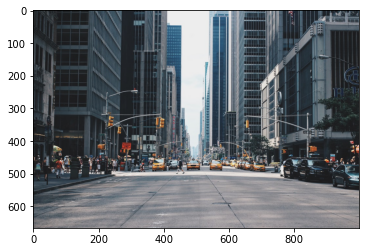

In [6]:
plt.imshow(image)

In [9]:
height, width, channel = image.shape

In [8]:
trans = np.array([
    [1, 0, 200],
    [0, 1.0, 200],
    [0, 0, 1]
])

In [10]:
trans_img = cv2.warpPerspective(image, trans, (width, height))

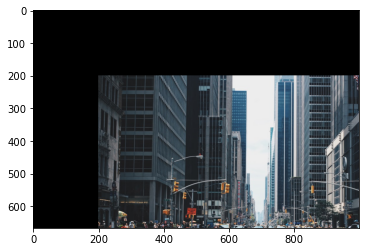

In [11]:
plt.imshow(trans_img)

In [13]:
trans_affine_img = cv2.warpAffine(image, trans[:2], (width, height))

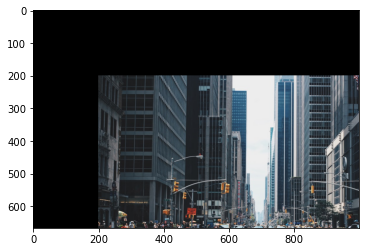

In [14]:
plt.imshow(trans_affine_img)

In [15]:
np.all(trans_affine_img == trans_img)

True

In [16]:
(trans_affine_img == trans_img).all()

True

In [18]:
# resize image could be done in two ways

resized_image = cv2.resize(image, None, fx=1.5, fy=1.8)

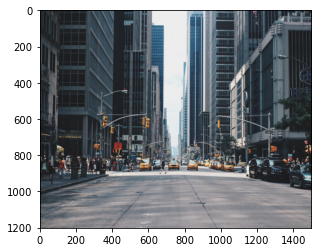

In [19]:
plt.imshow(resized_image)

In [20]:
# Use perpective

M = np.array([
    [1.5, 0, 0],
    [0, 1.8, 0],
    [0, 0, 1]
])

In [21]:
pers_resize = cv2.warpPerspective(image, M, (int(width * 2), int(height * 2.0)))

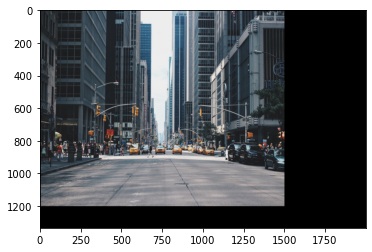

In [22]:
plt.imshow(pers_resize)

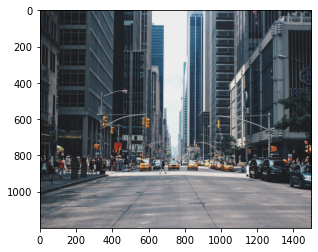

In [25]:
affine_resize = cv2.warpAffine(image, M[:2], (int(width * 1.5), int(height * 1.8)))
plt.imshow(affine_resize)

In [32]:
# shear mapping
# Use perpective

M = np.array([
    [1, 1.5, 0],
    [0.1, 1, 0],
    [0, 0, 1]
])

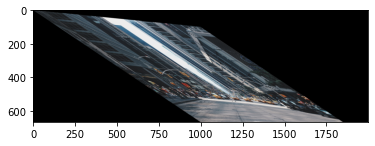

In [33]:
pers_shear = cv2.warpPerspective(image, M, (int(width * 2), int(height)))
plt.imshow(pers_shear)

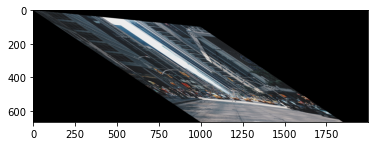

In [34]:
affine_shear = cv2.warpAffine(image, M[:2], (int(width * 2), int(height)))
plt.imshow(affine_shear)

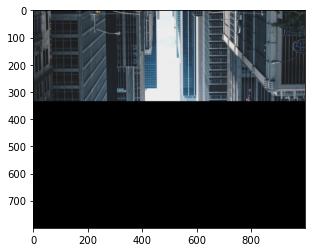

In [42]:
# flip

M = np.array([
    [1., 0, 0],
    [0, -1, 0.5 * height],
    [0, 0, 1]
])

# flip top down
pers_flip_image = cv2.warpPerspective(image, M, (int(width), int(height * 1.2)))
plt.imshow(pers_flip_image)

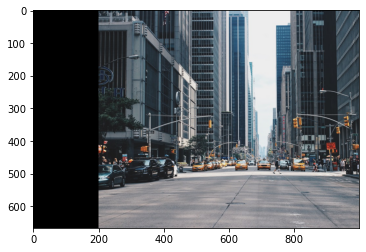

In [46]:
# flip

M = np.array([
    [-1.0, 0, 1.2 * width],
    [0, 1, 0],
    [0, 0, 1]
])

# flip left right
pers_flip_image = cv2.warpPerspective(image, M, (int(width), int(height)))
plt.imshow(pers_flip_image)

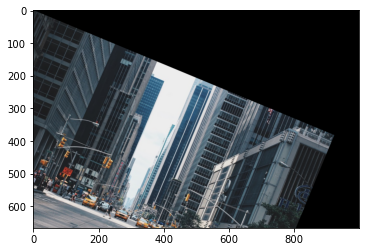

In [48]:
theta = np.pi / 8
# This rotation angle is from x-axis to y-axis.

M = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# flip left right
pers_flip_image = cv2.warpPerspective(image, M, (int(width), int(height)))
plt.imshow(pers_flip_image)

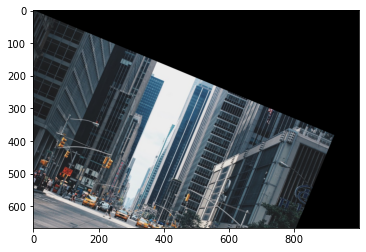

In [49]:
theta = np.pi / 8
# This rotation angle is from x-axis to y-axis.

M = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# flip left right
pers_flip_image = cv2.warpAffine(image, M[:2], (int(width), int(height)))
plt.imshow(pers_flip_image)

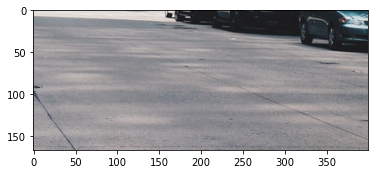

In [51]:
# cropping
plt.imshow(image[500:, 600:])

In [2]:
from scipy.signal import convolve2d as conv2d
def gau(kernel_size=9):
    sigma = kernel_size / 6.0
    x_coord, y_coord = np.meshgrid(
        np.arange(-kernel_size // 2, kernel_size // 2 + 1),
        np.arange(-kernel_size // 2, kernel_size // 2 + 1)
    )
    gau = np.exp(-(x_coord ** 2 + y_coord ** 2) / (2 * sigma ** 2))
    
    return gau / gau.sum()

[[ 2.80395914 10.45361829 10.70867402 10.50763485 10.13833076]
 [10.9201275  40.37668698 40.4981401  39.41745187 38.39805878]
 [11.55184286 42.35486854 41.39070581 39.94702248 39.47671038]
 [10.7080009  40.18387158 41.46577812 40.50066529 39.4255979 ]
 [10.16319519 39.15876586 43.13548382 42.92466462 40.57208735]]
Close:  True
(640, 992) (640, 992)
[[ 0.32120147  2.86709831  3.52558762  3.45859518  4.01713847]
 [ 2.97485183 26.27069036 31.79494025 31.18961088 35.71951628]
 [ 3.63008851 32.75852555 40.78450804 39.91988874 44.36150035]
 [ 3.48596929 31.91367056 41.86009322 41.88989177 42.96698846]
 [ 3.73483477 32.70018435 40.74766372 41.39145669 42.08515702]]
Close:  True
(320, 496) (320, 496)
[[ 0.07562879  1.15163858  1.73941136  1.89912467  2.15298992]
 [ 1.17499358 17.96031842 27.00541562 27.92671633 32.68992448]
 [ 1.73153711 26.9855194  40.95291939 35.89626418 45.22967818]
 [ 1.85021956 27.9389437  40.83246023 34.6710311  40.38067576]
 [ 1.74894009 26.91131303 41.12107582 35.88731

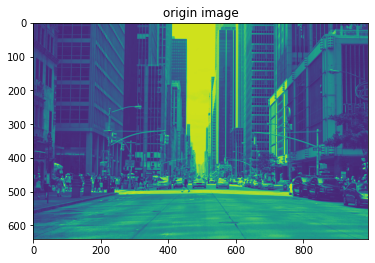

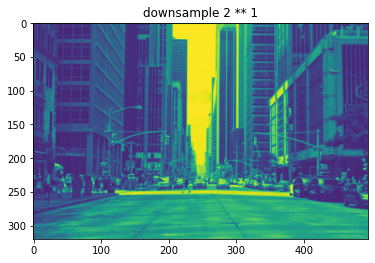

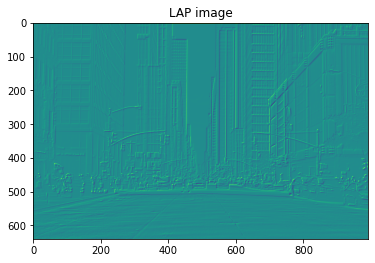

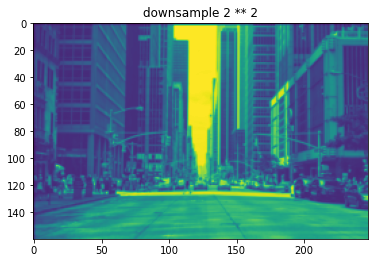

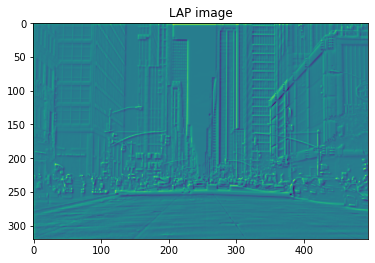

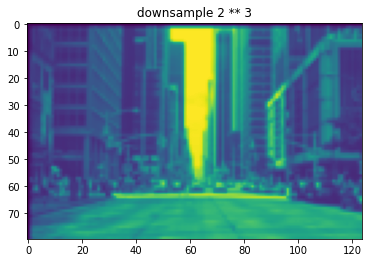

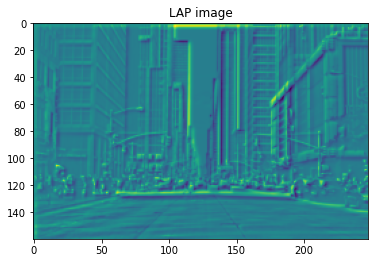

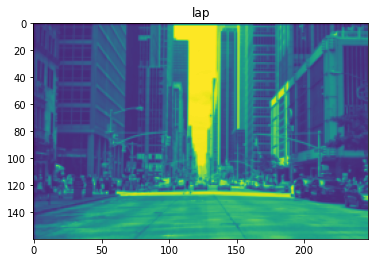

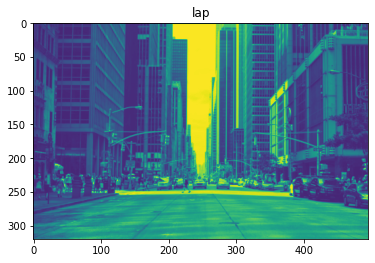

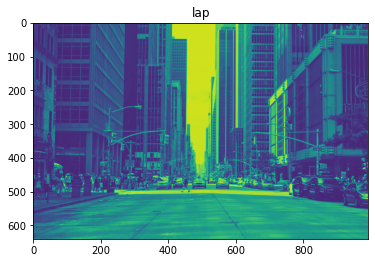

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import copy

image = cv2.cvtColor(plt.imread("city.jpeg"), cv2.COLOR_RGB2GRAY)
image = image[:640, :992]
plt.figure()
plt.imshow(image)

gau_pyramids = [copy.deepcopy(image)]
lap_pyramids = []

plt.title("origin image")




for i in range(3):
    smooth_image = conv2d(image, gau(5), "same")
#     print(image[:5, :5])
    shape = image.shape
    image = image[:int(shape[0] // 2 * 2), :int(shape[1] // 2 * 2)]
    # downsample
    ds_image = smooth_image[::2, ::2]
    print(ds_image[:5, :5])
    gau_pyramids.append(ds_image)
    up_image = cv2.resize(ds_image, tuple(map(lambda x : int(x * 2), ds_image.shape[::-1])))
    plt.figure()
    plt.imshow(ds_image)
    plt.title("downsample 2 ** {}".format(i + 1))
    plt.figure()
    
    # This laplacian is achieved by using the features before smooth-layer.
    lap_image = image - up_image
    
    print("Close: ", np.allclose(lap_image + cv2.resize(ds_image, tuple(map(lambda x : int(x * 2), ds_image.shape[::-1]))), image))
    
    print(image.shape, up_image.shape)
    lap_pyramids.append(lap_image)
    plt.imshow(lap_image)
    image = ds_image
    plt.title("LAP image")
    
res_img = gau_pyramids[-1]
print("last gau: ", res_img[:5, :5])

for idx, img in enumerate(gau_pyramids):
    print(idx, img.shape)
for idx, img in enumerate(lap_pyramids):
    print(idx, img.shape)

print(np.allclose(cv2.resize(gau_pyramids[-1], (248, 160)) + lap_pyramids[-1], gau_pyramids[-2]))
    

for i in range(3):
    print(res_img[:5, :5])
    up_image = cv2.resize(res_img, tuple(map(lambda x : int(x * 2), res_img.shape[::-1])))
    print(lap_pyramids[-i - 1].shape, up_image.shape)
    res_img = lap_pyramids[-i - 1]  + up_image
    print(np.allclose(res_img, gau_pyramids[-i - 2]))
    print(np.mean(res_img), np.mean(gau_pyramids[-i - 2]), np.abs(res_img - gau_pyramids[-i - 2]).mean())
    plt.figure()
    plt.imshow(res_img)
    plt.title("lap")
    
    


0 (640, 992)
1 (320, 496)
2 (160, 248)
3 (80, 124)
0 (640, 992)
1 (320, 496)
2 (160, 248)
False
(160, 248) (160, 248)
False
92.15406153086772 93.34016040535725 12.898737796832483
(320, 496) (320, 496)
False
92.403767583263 94.17890466683171 17.860276914231097
(640, 992) (640, 992)
False
92.55750338396132 94.6328125 21.58047574937977


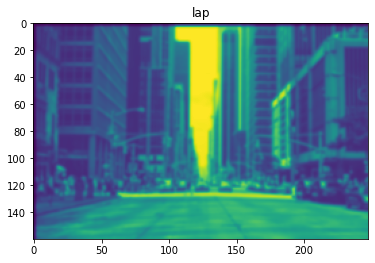

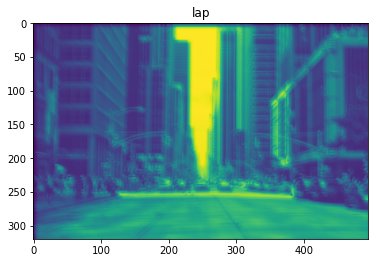

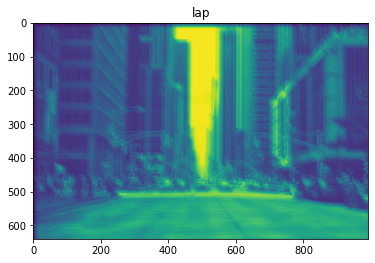

In [25]:
res_img = gau_pyramids[-1]

for idx, img in enumerate(gau_pyramids):
    print(idx, img.shape)
for idx, img in enumerate(lap_pyramids):
    print(idx, img.shape)

print(np.allclose(cv2.resize(gau_pyramids[-1], (248, 160)) + lap_pyramids[-1], gau_pyramids[-2]))
    

for i in range(3):
    up_image = cv2.resize(res_img, tuple(map(lambda x : int(x * 2), res_img.shape[::-1])))
    print(lap_pyramids[-i - 1].shape, up_image.shape)
    res_img = lap_pyramids[-i - 1]  + up_image
    print(np.allclose(res_img, gau_pyramids[-i - 2]))
    print(np.mean(res_img), np.mean(gau_pyramids[-i - 2]), np.abs(res_img - gau_pyramids[-i - 2]).mean())
    plt.figure()
    plt.imshow(res_img)
    plt.title("lap")
    